# Classificação de Saúde Fetal

A redução da mortalidade infantil está refletida em vários Objetivos de Desenvolvimento Sustentável das Nações 
Unidas e é um indicador chave do progresso humano.

A ONU espera que, até 2030, os países acabem com as mortes evitáveis de recém-nascidos e crianças menores de 
5 anos, com todos os países visando reduzir a mortalidade de menores de 5 anos para pelo menos 25 por 1.000 nascidos vivos.

Os cardiotocogramas (CTGs) são uma opção simples e de baixo custo para avaliar a saúde fetal, permitindo que os 
profissionais de saúde tomem medidas para prevenir a mortalidade infantil e materna. O equipamento funciona 
enviando pulsos de ultrassom e lendo sua resposta, lançando luz sobre a frequência cardíaca fetal (FCF), 
movimentos fetais, contrações uterinas e muito mais.


**Problema tirado do Kaggle: https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification**

**Referência dos dados originais: Ayres de Campos et al. (2000) SisPorto 2.0 A Program for Automated Analysis of Cardiotocograms. J Matern Fetal Med 5:311-318 (link)**

# Escopo da Solução Proposta - Canvas MVP

### Personas Segmentadas
- Obstetra
- Gestante

### Jornada

- Diagnosticar anomalias na saúde do feto
- Explicar fatores que influenciam no diagnóstico (não é escopo deste trabalho final)

### Proposta do MVP

Validar a hipótese se é possível reduzir o número de mortalidade infantis, através da identificação de possíveis anomalias na saúde do feto.

### Funcionalidades 

- Clasificação automática da saúde do feto.
- Explicar fatores mais relevantes para a classificação.

### Custo e Cronograma
- Squad full time de um desenvolvedor e dois cientistas de dados, por 5 meses. 
- Suporte part time de um Scrum Master, um Product Owner e um Analista de DevOps, por 5 meses.

### Resultado Esperado

- Identificar ao menos 70% dos óbitos que podem ser evitados.
- Reduzir o número de óbitos que podem ser evitados em 80%.

### Métricas para Validar as Hipóteses de Negócio

- Número de óbitos totais.
- Número de óbitos que poderiam ter sido evitados.
- Número de partos bem sucedidos (sem óbitos do bebê ou da mãe).
- Número de óbitos de bebês durante a estadia na maternidade.

# User Stories

## Listagem das Epics 

- EP01: **Como** Obstetra, **quero** executar a classificação automática do estado de saúde dos fetos, **para** saber se há risco de complicação de saúde ou óbito.
- EP01: **Como** Obstetra, **quero** a explicação de uma classificação individual, **para** entender os fatores mais relevantes que podem trazer risco de vida ao feto e a mãe.

## Regras Gerais

- As classes possíveis e identificáveis são: Normal (número 0), Suspeito (número 1) e Patológico (número 2).
- Atributos disponíveis são dados tabulares, extraídos de um exame CTG.

# EP01 - Detalhamento

## O que:

Executar a classificação automática do estado de saúde dos fetos, em três possíves estados: Normal, Suspeito ou Patológico

## Pra que

Saber se há risco de complicação de saúde ou óbito.

## Como

Através de técnicas de análise de dados e aprendizado de máquina, será possível identificar automaticamente as 3 classes mencionadas acima.


## Detalhamento de User Stories da Epic


1. US01 - Análise Exploratória dos Dados.

2. US02 - Pré Processamento e Limpeza dos Dados.

3. US03 - Experimentação Simples.

3. US04 - Extração e Seleção de Atributos.

4. US05 - Otimização da Modelagem de Aprendizado de Máquina.

5. US06 - Comparação dos Modelos escolhidos.

# US01 - Análise Exploratória dos Dados

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Conhecendo o dataset do problema

**Descrição dos atributos fornecidos:**

- baseline value - FHR baseline (beats per minute)
- accelerations - Number of accelerations per second
- fetal_movement - Number of fetal movements per second
- uterine_contractions - Number of uterine contractions per second
- light_decelerations - Number of light decelerations per second
- severe_decelerations - Number of severe decelerations per second
- prolongued_decelerations - Number of prolonged decelerations per second
- abnormal_short_term_variability - Percentage of time with abnormal short term variability
- mean_value_of_short_term_variability - Mean value of short term variability
- percentage_of_time_with_abnormal_long_term_variability - Percentage of time with abnormal long term variability
- mean_value_of_long_term_variability - Mean value of long term variability
- histogram_width - Width of FHR histogram
- histogram_min - Minimum (low frequency) of FHR histogram
- histogram_max - Maximum (high frequency) of FHR histogram
- histogram_number_of_peaks - Number of histogram peaks
- histogram_number_of_zeroes - Number of histogram zeros
- histogram_mode - Histogram mode
- histogram_mean - Histogram mean
- histogram_median - Histogram median
- histogram_variance - Histogram variance
- histogram_tendency - Histogram tendency

In [3]:
df = pd.read_csv("./fetal_health.csv")

In [6]:
df.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   
1                             17.0                                   2.1   
2                             16.0                                   2.1   
3                             16.0                                   2.4   
4                             16.0                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  ...  histogram_min  \
0                                               43.0       ...           62.0   
1                                                0.0       ...           68.0   
2                                                0.0       ...           68.0   
3                                                0.0       ...           53.0   
4                                                0.0       ...           53.0   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0          126.0                        2.0                         0.0   
1          198.0                        6.0                         1.0   
2          198.0                        5.0                         1.0   
3          170.0                       11.0                         0.0   
4          170.0                        9.0                         0.0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0           120.0           137.0             121.0                73.0   
1           141.0           136.0             140.0                12.0   
2           141.0           135.0             138.0                13.0   
3           137.0           134.0             137.0                13.0   
4           137.0           136.0             138.0                11.0   

   histogram_tendency  fetal_health  
0                 1.0           2.0  
1                 0.0           1.0  
2                 0.0           1.0  
3                 1.0           1.0  
4                 1.0           1.0  

[5 rows x 22 columns]

In [7]:
df.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

In [8]:
df.shape

(2126, 22)

In [10]:
df.describe()

baseline value  accelerations  fetal_movement  uterine_contractions  \
count     2126.000000    2126.000000     2126.000000           2126.000000   
mean       133.303857       0.003178        0.009481              0.004366   
std          9.840844       0.003866        0.046666              0.002946   
min        106.000000       0.000000        0.000000              0.000000   
25%        126.000000       0.000000        0.000000              0.002000   
50%        133.000000       0.002000        0.000000              0.004000   
75%        140.000000       0.006000        0.003000              0.007000   
max        160.000000       0.019000        0.481000              0.015000   

       light_decelerations  severe_decelerations  prolongued_decelerations  \
count          2126.000000           2126.000000               2126.000000   
mean              0.001889              0.000003                  0.000159   
std               0.002960              0.000057                  0.000590   
min               0.000000              0.000000                  0.000000   
25%               0.000000              0.000000                  0.000000   
50%               0.000000              0.000000                  0.000000   
75%               0.003000              0.000000                  0.000000   
max               0.015000              0.001000                  0.005000   

       abnormal_short_term_variability  mean_value_of_short_term_variability  \
count                      2126.000000                           2126.000000   
mean                         46.990122                              1.332785   
std                          17.192814                              0.883241   
min                          12.000000                              0.200000   
25%                          32.000000                              0.700000   
50%                          49.000000                              1.200000   
75%                          61.000000                              1.700000   
max                          87.000000                              7.000000   

       percentage_of_time_with_abnormal_long_term_variability  ...  \
count                                         2126.00000       ...   
mean                                             9.84666       ...   
std                                             18.39688       ...   
min                                              0.00000       ...   
25%                                              0.00000       ...   
50%                                              0.00000       ...   
75%                                             11.00000       ...   
max                                             91.00000       ...   

       histogram_min  histogram_max  histogram_number_of_peaks  \
count    2126.000000    2126.000000                2126.000000   
mean       93.579492     164.025400                   4.068203   
std        29.560212      17.944183                   2.949386   
min        50.000000     122.000000                   0.000000   
25%        67.000000     152.000000                   2.000000   
50%        93.000000     162.000000                   3.000000   
75%       120.000000     174.000000                   6.000000   
max       159.000000     238.000000                  18.000000   

       histogram_number_of_zeroes  histogram_mode  histogram_mean  \
count                 2126.000000     2126.000000     2126.000000   
mean                     0.323612      137.452023      134.610536   
std                      0.706059       16.381289       15.593596   
min                      0.000000       60.000000       73.000000   
25%                      0.000000      129.000000      125.000000   
50%                      0.000000      139.000000      136.000000   
75%                      0.000000      148.000000      145.000000   
max                     10.000000      187.000000      182.000000   

       histogram_median  histogr

In [16]:
print("Contando a porcetagem dos valores nulos:")
df.isna().sum() * 100 / df.shape[0]

Contando a porcetagem dos valores nulos:


baseline value                                            0.0
accelerations                                             0.0
fetal_movement                                            0.0
uterine_contractions                                      0.0
light_decelerations                                       0.0
severe_decelerations                                      0.0
prolongued_decelerations                                  0.0
abnormal_short_term_variability                           0.0
mean_value_of_short_term_variability                      0.0
percentage_of_time_with_abnormal_long_term_variability    0.0
mean_value_of_long_term_variability                       0.0
histogram_width                                           0.0
histogram_min                                             0.0
histogram_max                                             0.0
histogram_number_of_peaks                                 0.0
histogram_number_of_zeroes                                0.0
histogra

In [22]:
values_in_columns = [(col,df[col].unique().shape[0]) for col in df.columns]
print("Valores distintos por coluna:")
values_in_columns

Valores distintos por coluna:


[('baseline value', 48),
 ('accelerations', 20),
 ('fetal_movement', 102),
 ('uterine_contractions', 16),
 ('light_decelerations', 16),
 ('severe_decelerations', 2),
 ('prolongued_decelerations', 6),
 ('abnormal_short_term_variability', 75),
 ('mean_value_of_short_term_variability', 57),
 ('percentage_of_time_with_abnormal_long_term_variability', 87),
 ('mean_value_of_long_term_variability', 249),
 ('histogram_width', 154),
 ('histogram_min', 109),
 ('histogram_max', 86),
 ('histogram_number_of_peaks', 18),
 ('histogram_number_of_zeroes', 9),
 ('histogram_mode', 88),
 ('histogram_mean', 103),
 ('histogram_median', 95),
 ('histogram_variance', 133),
 ('histogram_tendency', 3),
 ('fetal_health', 3)]

In [6]:
def plot_numerical_distributions(df,columns,title,n_rows = 2,n_columns = 2,figure_size = (20, 12)):
    if (n_rows * n_columns) < len(columns):
        raise Exception('Dataset Variables to be shown must be the equal or smallerthe number of rows and columns.')
    fig, axes = plt.subplots(n_rows,n_columns,figsize=figure_size)
    fig.suptitle(title,fontsize = 20)
    
    for index,col in enumerate(columns):
        
        if n_rows == 1 or n_columns == 1:
            current_ax = axes[index]
        else:
            row_index = int(index/n_columns)
            col_index = int(index - n_columns*row_index)
            current_ax = axes[row_index][col_index]

        
        ax = sns.distplot(df[col], norm_hist=False,ax = current_ax,kde = False) 
        ax.set_title(col)
        label = r'$\mu={:2.2f},\ \sigma={:2.2f},\ median={:2.2f},\ mode={:2.2f}$'.format(df[col].mean(),df[col].std(),df[col].median(),df[col].mode().values[0])
        ax.set_xlabel(label)
    plt.subplots_adjust(top=0.9,hspace = 0.25)    
    plt.show()
    
def plot_numerical_correlation(df,target):
    scatter_matrix = sns.pairplot(df,hue=target,height = 4);
    scatter_matrix.fig.suptitle('Correlation Between Numerical Variables',fontsize = 20);
    plt.subplots_adjust(top=0.95)

In [20]:
histogram_features = [col for col in df.columns if ('histogram_' in col) or ('fetal_health' == col)]
non_histogram_features = [col for col in df.columns if ('histogram_' not in col)]


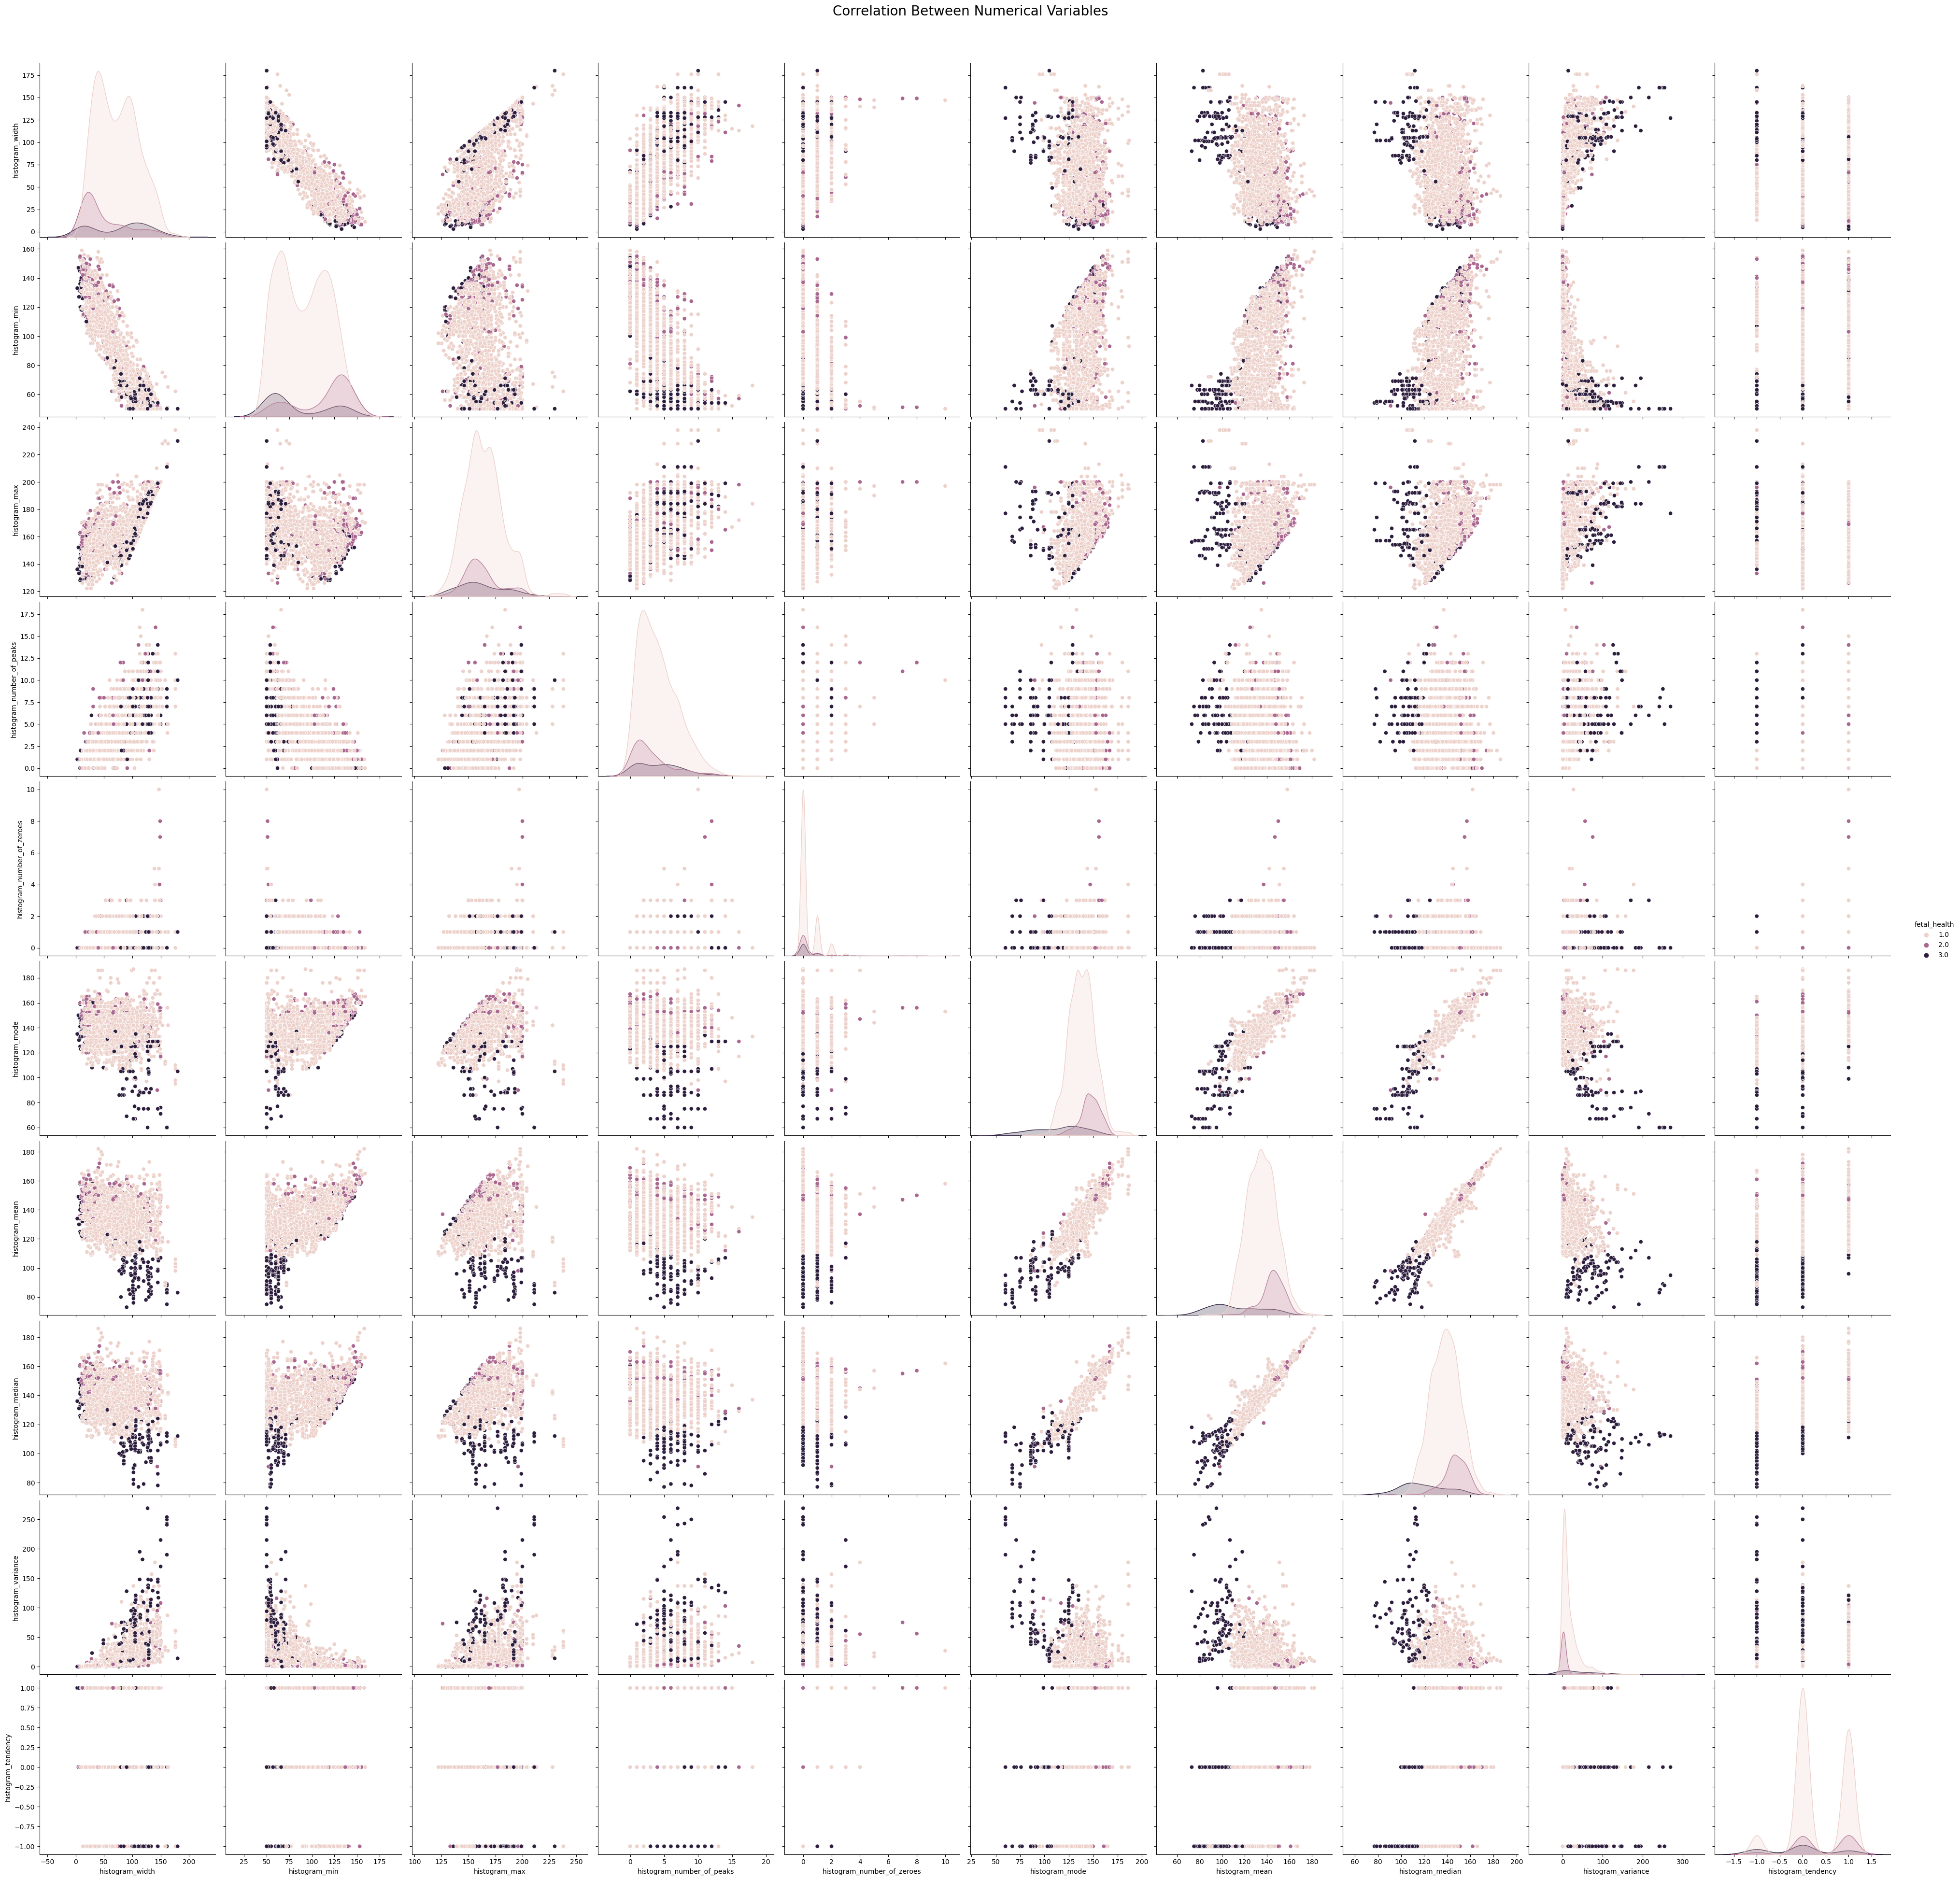

In [22]:
plot_numerical_correlation(df=df[histogram_features],target='fetal_health')

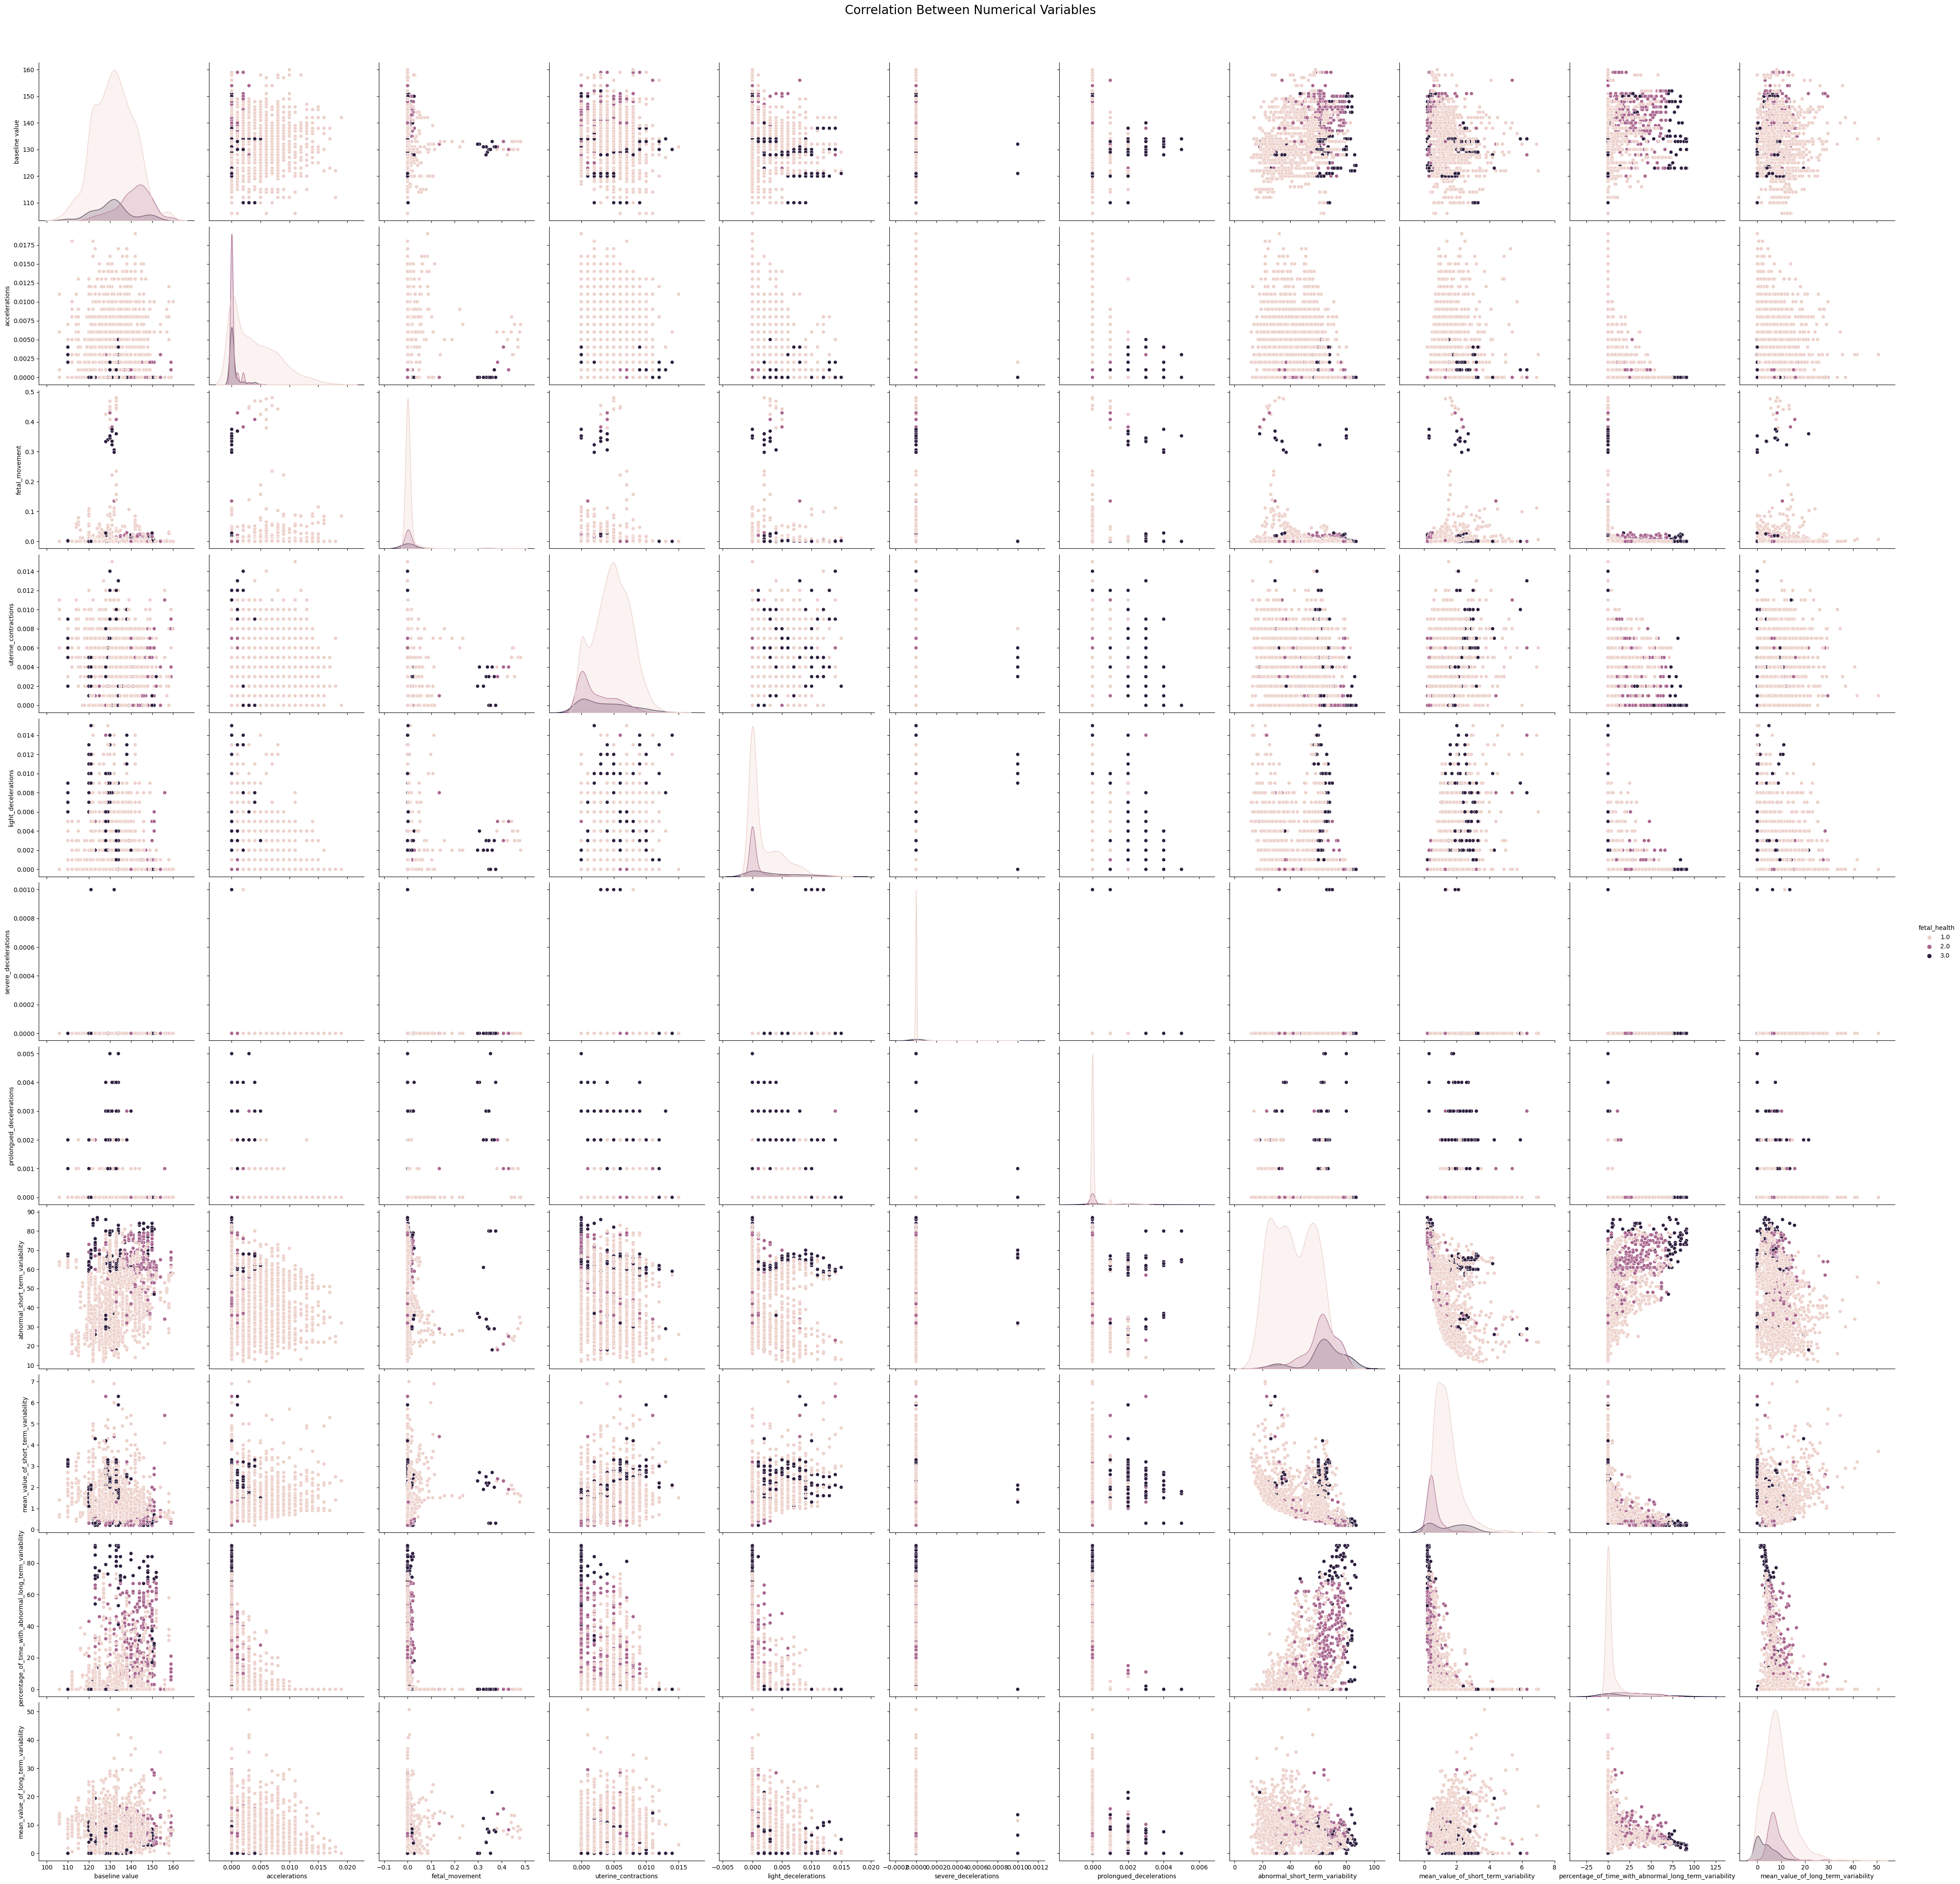

In [21]:
plot_numerical_correlation(df=df[non_histogram_features],target='fetal_health')

In [23]:
# TODO: plotar grafico de barra com qtd de classes! 

Observações:

- O conjunto fornecido possui aproximadamente 2100 instâncias de dados e 22 atributos.
- O atributo que deverá ser predito é o 'fetal_health'.
- Curiosamente, os dados fornecidos estão todos preenchidos. Isto é, não há dados faltantes.
- Analisando a distribuição dos dados e sua descrição, pode-se concluir que todos os atributos são numéricos (float).
- A amplitude dos atributos varia consideravelmente. Enquanto alguns dados estão na magnitude dos décimos, outros estão na magnitude das centenas. É um forte indício que haverá necessidade de normalizar os dados, a depender do modelo de ML que será aplicado.
- Como o problema possui um forte desbalanceamento entre classes, as métricas mais adequadas para avaliar são o F1-score e AUC-ROC (area sob a curva ROC).

As proximas user stories estao nos notebooks seguintes.